# Parte A.p1

# 1. Configuraciones iniciales

## 1.1 Import de librerias

In [51]:
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from funpymodeling import status

In [52]:
# Configuraciones
pd.set_option('display.max_columns', None)

## 1.2 Lectura de datos

In [53]:
df_json_nested = pd.read_json('../data/customers.json', lines=True)
df_json_nested.head()

,fraudulent,customer,orders,paymentMethods,transactions
0,False,"{'customerEmail': 'josephhoward@yahoo.com', 'c...","[{'orderId': 'vjbdvd', 'orderAmount': 18, 'ord...","[{'paymentMethodId': 'wt07xm68b', 'paymentMeth...","[{'transactionId': 'a9lcj51r', 'orderId': 'vjb..."
1,True,"{'customerEmail': 'evansjeffery@yahoo.com', 'c...","[{'orderId': 'nlghpa', 'orderAmount': 45, 'ord...","[{'paymentMethodId': 'y3xp697jx', 'paymentMeth...","[{'transactionId': '5mi94sfw', 'orderId': 'nlg..."
2,False,"{'customerEmail': 'andersonwilliam@yahoo.com',...","[{'orderId': 'yk34y2', 'orderAmount': 33, 'ord...","[{'paymentMethodId': '8pneoi03z', 'paymentMeth...","[{'transactionId': 'q3lyvbza', 'orderId': 'yk3..."
3,False,"{'customerEmail': 'rubenjuarez@yahoo.com', 'cu...","[{'orderId': 'fbz9ep', 'orderAmount': 34, 'ord...","[{'paymentMethodId': 'pdxjdwui4', 'paymentMeth...","[{'transactionId': 'vx4cjc27', 'orderId': 'fbz..."
4,True,"{'customerEmail': 'uchen@malone.com', 'custome...","[{'orderId': '56h7iw', 'orderAmount': 71, 'ord...","[{'paymentMethodId': 'w1i1zq3rg', 'paymentMeth...","[{'transactionId': 'q8j3dgni', 'orderId': '56h..."


El json esta anidado, se debe desanidar para poder trabajar con los datos.

## 1.3 Desanidado de columnas

In [54]:
fraudulent_df = df_json_nested['fraudulent']
fraudulent_df.head()

0    False
1     True
2    False
3    False
4     True
Name: fraudulent, dtype: bool

Las columnas se desanidaran en orden, comenzando por _customers_ ya que _fradulent_ se encuentra en un estado correcto.

In [55]:
# Columna customers, es un json
customers_df = json_normalize(df_json_nested['customer'])
customers_df.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896"
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250"
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM..."
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,..."


In [56]:
# Columna orders, es un lista
orders_nested = pd.DataFrame([md for md in df_json_nested['orders']])

orders_list=[]

for index, row in orders_nested.iterrows():
    for order in row:
        if order != None:
            orders_list.append(order)

orders_df = pd.DataFrame(orders_list)

orders_df.head()

,orderId,orderAmount,orderState,orderShippingAddress
0,vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896"
1,yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896"
2,nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497"
3,uw0eeb,23,fulfilled,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
4,bn44oh,43,fulfilled,"5093 Bryan Forks\nJoshuaton, FM 01565-9801"


In [57]:
# Columna paymentMethods, es una lista

In [58]:
# Columna transactions, es una lista
transactions_nested = pd.DataFrame([md for md in df_json_nested['transactions']])

transactions_list=[]

for index, row in transactions_nested.iterrows():
    for order in row:
        if order != None:
            transactions_list.append(order)

transactions_df = pd.DataFrame(transactions_list)

transactions_df.head()


,transactionId,orderId,paymentMethodId,transactionAmount,transactionFailed
0,a9lcj51r,vjbdvd,wt07xm68b,18,False
1,y4wcv03i,yp6x27,wt07xm68b,26,False
2,5mi94sfw,nlghpa,41ug157xz,45,False
3,br8ba1nu,uw0eeb,41ug157xz,23,False
4,a33145ss,bn44oh,y3xp697jx,43,True


In [59]:
# Columna paymentMethods, es una lista
paymentMethods_nested = pd.DataFrame([md for md in df_json_nested['paymentMethods']])

paymentMethods_list=[]

for index, row in paymentMethods_nested.iterrows():
    for order in row:
        if order != None:
            paymentMethods_list.append(order)

paymentMethods_df = pd.DataFrame(paymentMethods_list)

paymentMethods_df.head()

,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer
0,wt07xm68b,True,card,JCB 16 digit,Citizens First Banks
1,y3xp697jx,True,bitcoin,VISA 16 digit,Solace Banks
2,6krszxc05,False,card,VISA 16 digit,Vertex Bancorp
3,5z1szj2he,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.
4,m52tx8e1s,False,card,Mastercard,Vertex Bancorp


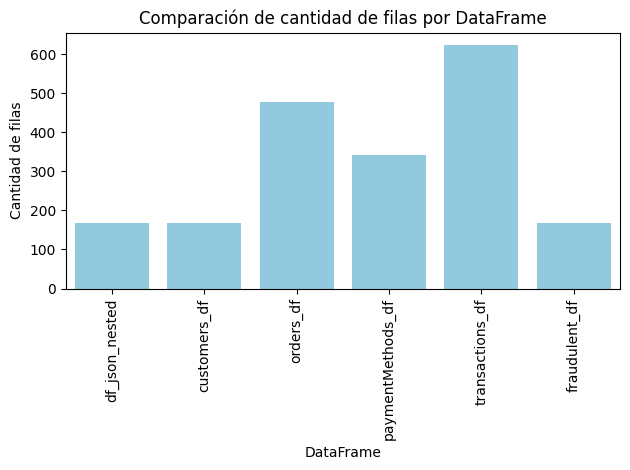

In [60]:
# Comparativa de datos obtenidos en cada df

row_counts = pd.DataFrame({
    'DataFrame': ['df_json_nested', 'customers_df', 'orders_df', 'paymentMethods_df', 'transactions_df', 'fraudulent_df'],
    'Rows': [len(df_json_nested), len(customers_df), len(orders_df), len(paymentMethods_df), len(transactions_df), len(fraudulent_df)]
})

sns.barplot(data=row_counts, x='DataFrame', y='Rows', palette=['skyblue'])

plt.title("Comparación de cantidad de filas por DataFrame")
plt.ylabel("Cantidad de filas")
plt.xlabel("DataFrame")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Importante: Se observa una diferencia entre la cantidad de filas de los json, esto sucede porque es un esquema jdbc donde 1 cliente puede tener por ejemplo, varias transacciones. 
El merge se basará en la idea de que las transacciones son fraudulentas.

## 1.3 Unir / Mergear dataframes

In [61]:
data = pd.concat([customers_df, orders_df, paymentMethods_df, transactions_df, fraudulent_df], axis=1)

data.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,orderId,orderAmount,orderState,orderShippingAddress,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,transactionId,orderId,paymentMethodId,transactionAmount,transactionFailed,fraudulent
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",vjbdvd,18.0,pending,"5493 Jones Islands\nBrownside, CA 51896",wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,a9lcj51r,vjbdvd,wt07xm68b,18,False,False
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,yp6x27,26.0,fulfilled,"5493 Jones Islands\nBrownside, CA 51896",y3xp697jx,True,bitcoin,VISA 16 digit,Solace Banks,y4wcv03i,yp6x27,wt07xm68b,26,False,True
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",nlghpa,45.0,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497",6krszxc05,False,card,VISA 16 digit,Vertex Bancorp,5mi94sfw,nlghpa,41ug157xz,45,False,False
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",uw0eeb,23.0,fulfilled,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,5z1szj2he,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.,br8ba1nu,uw0eeb,41ug157xz,23,False,False
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",bn44oh,43.0,fulfilled,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",m52tx8e1s,False,card,Mastercard,Vertex Bancorp,a33145ss,bn44oh,y3xp697jx,43,True,True


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customerEmail                     168 non-null    object 
 1   customerPhone                     168 non-null    object 
 2   customerDevice                    168 non-null    object 
 3   customerIPAddress                 168 non-null    object 
 4   customerBillingAddress            168 non-null    object 
 5   orderId                           478 non-null    object 
 6   orderAmount                       478 non-null    float64
 7   orderState                        478 non-null    object 
 8   orderShippingAddress              478 non-null    object 
 9   paymentMethodId                   342 non-null    object 
 10  paymentMethodRegistrationFailure  342 non-null    object 
 11  paymentMethodType                 342 non-null    object 
 12  paymentM

# 2) Feature Engineering

In [63]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,customerEmail,455,0.730337,0,0.000000,161,object
1,customerPhone,455,0.730337,0,0.000000,168,object
2,customerDevice,455,0.730337,0,0.000000,168,object
3,customerIPAddress,455,0.730337,0,0.000000,165,object
4,customerBillingAddress,455,0.730337,0,0.000000,166,object
5,orderId,145,0.232745,0,0.000000,478,object
6,orderAmount,145,0.232745,0,0.000000,67,float64
7,orderState,145,0.232745,0,0.000000,3,object
8,orderShippingAddress,145,0.232745,0,0.000000,274,object
9,paymentMethodId,281,0.451043,0,0.000000,342,object


## 2.1) Columnas dupplicadas

In [64]:
data = data.loc[:,~data.columns.duplicated()].copy()

_Hecho según: https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns_

In [65]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,customerEmail,455,0.730337,0,0.000000,161,object
1,customerPhone,455,0.730337,0,0.000000,168,object
2,customerDevice,455,0.730337,0,0.000000,168,object
3,customerIPAddress,455,0.730337,0,0.000000,165,object
4,customerBillingAddress,455,0.730337,0,0.000000,166,object
5,orderId,145,0.232745,0,0.000000,478,object
6,orderAmount,145,0.232745,0,0.000000,67,float64
7,orderState,145,0.232745,0,0.000000,3,object
8,orderShippingAddress,145,0.232745,0,0.000000,274,object
9,paymentMethodId,281,0.451043,0,0.000000,342,object


## 2.2) Transformación de Emails

Transformación de los dominios a dominios conocidos (3) o desconocidos.

In [66]:
email_domains = []
mails=[]
popular_providers = ['yahoo', 'gmail', 'hotmail']


"""
aux= proveedor.com
mail= proveedor
dominio= com
"""
for email in data['customerEmail']:
    try:
        # Yahoo
        aux = email.split('@')[1]
        mail = aux.split('.')[0]
        domain = aux.split('.')[1]
        if mail in popular_providers:
            mails.append(mail)
        else:
            mails.append('other')
        email_domains.append(domain)

    except:
        email_domains.append('weird')
        mails.append('weird')


data['emailDomain'] = email_domains
data['emailProvider'] = mails

In [67]:
data = data.drop(['customerEmail'], axis=1)
data.head(5)

,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,orderId,orderAmount,orderState,orderShippingAddress,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,transactionId,transactionAmount,transactionFailed,fraudulent,emailDomain,emailProvider
0,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",vjbdvd,18.0,pending,"5493 Jones Islands\nBrownside, CA 51896",wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,a9lcj51r,18,False,False,com,yahoo
1,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,yp6x27,26.0,fulfilled,"5493 Jones Islands\nBrownside, CA 51896",y3xp697jx,True,bitcoin,VISA 16 digit,Solace Banks,y4wcv03i,26,False,True,com,yahoo
2,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",nlghpa,45.0,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497",6krszxc05,False,card,VISA 16 digit,Vertex Bancorp,5mi94sfw,45,False,False,com,yahoo
3,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",uw0eeb,23.0,fulfilled,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,5z1szj2he,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.,br8ba1nu,23,False,False,com,yahoo
4,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",bn44oh,43.0,fulfilled,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",m52tx8e1s,False,card,Mastercard,Vertex Bancorp,a33145ss,43,True,True,com,other


## 2.3) IP Address

Extracción de información a partir de la customerIPAdress y digits_and_letters

In [68]:
# Considerando que una subnet mask normal es 255.255.255.255, contando la cantidad de digitos (incluyendo puntos)

longitudIP = len("255.255.255.255")
print(longitudIP)

15


In [69]:
IP_Address = []
for adress in data['customerIPAddress']:
    aux_address = str(adress) #Cambio a string

    # Consideramos extraña si una adress tiene mas de 15 digitos
    if len(aux_address) > longitudIP:
        IP_Address.append('long_address')
    else:
        IP_Address.append('short_address')

data['customerIPAdress_checked'] = IP_Address

data.head(3)

,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,orderId,orderAmount,orderState,orderShippingAddress,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,transactionId,transactionAmount,transactionFailed,fraudulent,emailDomain,emailProvider,customerIPAdress_checked
0,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",vjbdvd,18.0,pending,"5493 Jones Islands\nBrownside, CA 51896",wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,a9lcj51r,18,False,False,com,yahoo,short_address
1,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,yp6x27,26.0,fulfilled,"5493 Jones Islands\nBrownside, CA 51896",y3xp697jx,True,bitcoin,VISA 16 digit,Solace Banks,y4wcv03i,26,False,True,com,yahoo,short_address
2,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",nlghpa,45.0,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497",6krszxc05,False,card,VISA 16 digit,Vertex Bancorp,5mi94sfw,45,False,False,com,yahoo,long_address


In [70]:
data = data.drop(['customerIPAddress'], axis=1)
data.head(3)

,customerPhone,customerDevice,customerBillingAddress,orderId,orderAmount,orderState,orderShippingAddress,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,transactionId,transactionAmount,transactionFailed,fraudulent,emailDomain,emailProvider,customerIPAdress_checked
0,400-108-5415,yyeiaxpltf82440jnb3v,"5493 Jones Islands\nBrownside, CA 51896",vjbdvd,18.0,pending,"5493 Jones Islands\nBrownside, CA 51896",wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,a9lcj51r,18,False,False,com,yahoo,short_address
1,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,yp6x27,26.0,fulfilled,"5493 Jones Islands\nBrownside, CA 51896",y3xp697jx,True,bitcoin,VISA 16 digit,Solace Banks,y4wcv03i,26,False,True,com,yahoo,short_address
2,024.420.0375,4m7h5ipl1shyavt6vv2r,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",nlghpa,45.0,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497",6krszxc05,False,card,VISA 16 digit,Vertex Bancorp,5mi94sfw,45,False,False,com,yahoo,long_address


## 2.4) Comparativa de ubicación de compra

Permite definir si la compra se realizo desde la ciudad de la persona real y no desde una redirección.

In [71]:
def extract_city_name(name_column):
    city_list = []
    for address in data[name_column]:
        try:
            # El bucle obtiene el nombre de la ciudad abrebiado y lo guarda en la lista city_list
            aux = address.split('\n')[1]
            city_with_number = aux.split(', ')[1]
            city = city_with_number.split(' ')[0]

            city_list.append(city)
        except:
            city_list.append("unknown")
    return city_list

data['customerBillingAddress'] = extract_city_name('customerBillingAddress')
data['orderShippingAddress'] = extract_city_name('orderShippingAddress')

In [72]:
data.head()

,customerPhone,customerDevice,customerBillingAddress,orderId,orderAmount,orderState,orderShippingAddress,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,transactionId,transactionAmount,transactionFailed,fraudulent,emailDomain,emailProvider,customerIPAdress_checked
0,400-108-5415,yyeiaxpltf82440jnb3v,CA,vjbdvd,18.0,pending,CA,wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,a9lcj51r,18,False,False,com,yahoo,short_address
1,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,NM,yp6x27,26.0,fulfilled,CA,y3xp697jx,True,bitcoin,VISA 16 digit,Solace Banks,y4wcv03i,26,False,True,com,yahoo,short_address
2,024.420.0375,4m7h5ipl1shyavt6vv2r,PR,nlghpa,45.0,fulfilled,CA,6krszxc05,False,card,VISA 16 digit,Vertex Bancorp,5mi94sfw,45,False,False,com,yahoo,long_address
3,670.664.8168x94985,slovx60t0i558may4ks0,FM,uw0eeb,23.0,fulfilled,NM,5z1szj2he,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.,br8ba1nu,23,False,False,com,yahoo,long_address
4,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,TN,bn44oh,43.0,fulfilled,FM,m52tx8e1s,False,card,Mastercard,Vertex Bancorp,a33145ss,43,True,True,com,other,short_address


Comparativa de ambos address

In [74]:
same_city = []

for index in range(len(data)):
    billing= data['customerBillingAddress'][index]
    order= data['orderShippingAddress'][index]

    response ='unknown'
    if billing != 'unknown' and order != 'unknown':
        if billing == order:
            response = 'yes'
        else:
            response = 'no'

    same_city.append(response)

data['sameCity'] = same_city

In [76]:
data =data.drop(['customerBillingAddress', 'orderShippingAddress'], axis = 1)

Se eliminan ambas porque se asume que cuando son distintas una transaccion es mas dudosa, y esa información ya se encuentra en same_city

In [77]:
data.head(3)

,customerPhone,customerDevice,orderId,orderAmount,orderState,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,transactionId,transactionAmount,transactionFailed,fraudulent,emailDomain,emailProvider,customerIPAdress_checked,sameCity
0,400-108-5415,yyeiaxpltf82440jnb3v,vjbdvd,18.0,pending,wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,a9lcj51r,18,False,False,com,yahoo,short_address,yes
1,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,yp6x27,26.0,fulfilled,y3xp697jx,True,bitcoin,VISA 16 digit,Solace Banks,y4wcv03i,26,False,True,com,yahoo,short_address,no
2,024.420.0375,4m7h5ipl1shyavt6vv2r,nlghpa,45.0,fulfilled,6krszxc05,False,card,VISA 16 digit,Vertex Bancorp,5mi94sfw,45,False,False,com,yahoo,long_address,no
